#Web Markerting Data


### Data Loading
At the first, we need to import all the related libraries.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


**Loading data by URL**

The data to work is located in CSV file by the following link: https://rawgithubusercontent.com/dinhhluu/Web-Marketing-Campaign-Performance-Analysis/main/web_marketing_data.csv

Read the given dataset into a pandas dataframe

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/dinhhluu/Web-Marketing-Campaign-Performance-Analysis/main/web_marketing_data.csv')

**Data profiling**

Let's take a look at the loaded data.

Output 5 first rows:

In [124]:
df.head()

,Date,User_ID,Session_Duration,Page_Views,Source,Medium,Campaign,Device_Category,Country,New_User,Conversions,Revenue
0,6/6/2023,1,448,7,Referral,Direct,Spring Promo,Tablet,USA,1,2,124
1,6/19/2023,2,94,1,Referral,Social Media,Summer Sale,Desktop,India,1,1,130
2,6/29/2023,3,595,6,Direct,Referral,Winter Campaign,Tablet,India,1,1,136
3,6/1/2023,4,263,9,Social,Organic Search,NaN,Tablet,Australia,1,0,0
4,6/30/2023,5,242,1,Referral,Referral,Spring Promo,Tablet,USA,0,0,0


**Data structure overview**

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              10000 non-null  object
 1   User_ID           10000 non-null  int64 
 2   Session_Duration  10000 non-null  int64 
 3   Page_Views        10000 non-null  int64 
 4   Source            10000 non-null  object
 5   Medium            10000 non-null  object
 6   Campaign          7510 non-null   object
 7   Device_Category   10000 non-null  object
 8   Country           10000 non-null  object
 9   New_User          10000 non-null  int64 
 10  Conversions       10000 non-null  int64 
 11  Revenue           10000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 937.6+ KB


##Data Cleaning

**Duplicate Value Check**

During the duplicate checking process, potential duplication based on combinations of User_ID and Campaign was considered, as a single user may participate in multiple marketing campaigns. However, in this dataset, each row represents a unique user session, and User_ID functions as a sequential identifier rather than a persistent customer identifier. As a result, duplicate records were evaluated at the session level, and no exact duplicate rows were detected in the dataset.

In [126]:
df.duplicated().sum()

np.int64(0)

Based on the Descriptive statistics Table, we don't realize any Outlier values but we have to check again with other function

**Correct Data Types **

Types fixing You can find a lot of wrong types. Let's fix it!

Automatic fixing Pandas is able to convert columns to the best possible dtypes itself.

In [127]:
df = df.convert_dtypes()

... and then show columns and types again.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              10000 non-null  string
 1   User_ID           10000 non-null  Int64 
 2   Session_Duration  10000 non-null  Int64 
 3   Page_Views        10000 non-null  Int64 
 4   Source            10000 non-null  string
 5   Medium            10000 non-null  string
 6   Campaign          7510 non-null   string
 7   Device_Category   10000 non-null  string
 8   Country           10000 non-null  string
 9   New_User          10000 non-null  Int64 
 10  Conversions       10000 non-null  Int64 
 11  Revenue           10000 non-null  Int64 
dtypes: Int64(6), string(6)
memory usage: 996.2 KB


In [129]:
df['Date']=pd.to_datetime(df['Date'])

Let's check again!

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              10000 non-null  datetime64[ns]
 1   User_ID           10000 non-null  Int64         
 2   Session_Duration  10000 non-null  Int64         
 3   Page_Views        10000 non-null  Int64         
 4   Source            10000 non-null  string        
 5   Medium            10000 non-null  string        
 6   Campaign          7510 non-null   string        
 7   Device_Category   10000 non-null  string        
 8   Country           10000 non-null  string        
 9   New_User          10000 non-null  Int64         
 10  Conversions       10000 non-null  Int64         
 11  Revenue           10000 non-null  Int64         
dtypes: Int64(6), datetime64[ns](1), string(5)
memory usage: 996.2 KB


**Replace NaN by Others to do analytic**

In [131]:
df["Campaign"] = df["Campaign"].fillna("Others")

In [132]:
df.sample(5)

,Date,User_ID,Session_Duration,Page_Views,Source,Medium,Campaign,Device_Category,Country,New_User,Conversions,Revenue
7419,2023-06-24,7420,326,1,Social,Referral,Others,Mobile,UK,1,3,432
7481,2023-06-08,7482,326,7,Referral,Organic Search,Winter Campaign,Tablet,Canada,0,0,0
349,2023-06-09,350,157,2,Referral,Direct,Winter Campaign,Tablet,Germany,0,2,272
8285,2023-06-15,8286,359,6,Referral,Referral,Winter Campaign,Desktop,Australia,0,1,117
5448,2023-06-16,5449,586,8,Organic,Social Media,Others,Desktop,USA,1,1,79


**Check Outlier**

In [133]:
# Xử lý giá trị Outlier
num_cols = [
    "Session_Duration",
    "Page_Views",
    "Conversions",
    "Revenue"
]

def outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

for col in num_cols:
    outliers = outlier_iqr(df[col])
    print(col, ":", len(outliers), "outliers")

Session_Duration : 0 outliers
Page_Views : 0 outliers
Conversions : 0 outliers
Revenue : 0 outliers


Based on the IQR method, no outliers were detected in the numerical variables including Session Duration, Page Views, Conversions, and Revenue. Therefore, no outlier removal was required, and the dataset was retained in its original form for subsequent analysis.

**Descriptive statistics**

Show the basic descriptive statistics for the entire dataframe.

In [134]:
df.describe()

,Date,User_ID,Session_Duration,Page_Views,New_User,Conversions,Revenue
count,10000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,2023-06-15 14:07:17.760000,5000.5,331.5929,5.4594,0.4949,1.5086,151.2789
min,2023-06-01 00:00:00,1.0,60.0,1.0,0.0,0.0,0.0
25%,2023-06-08 00:00:00,2500.75,197.0,3.0,0.0,1.0,52.0
50%,2023-06-16 00:00:00,5000.5,334.0,5.0,0.0,1.0,134.0
75%,2023-06-23 00:00:00,7500.25,465.0,8.0,1.0,3.0,242.0
max,2023-06-30 00:00:00,10000.0,600.0,10.0,1.0,3.0,450.0
std,NaN,2886.89568,155.463779,2.865619,0.499999,1.114383,124.741268


The dataset consists of 10,000 session-level observations. The average session duration is approximately 332 seconds, with most sessions ranging between 197 and 465 seconds, indicating moderate user engagement. On average, users view about 5 to 6 pages per session, suggesting typical browsing behavior on the website.

Regarding conversion outcomes, the mean number of conversions per session is approximately 1.5, while the median is 1, indicating that most sessions result in at most one conversion. Revenue shows a moderate level of variability, with an average revenue of approximately 152 USD per session and values ranging from 0 to 450 USD, reflecting differences in user purchasing behavior.

Overall, the descriptive statistics suggest a reasonably well-distributed dataset without extreme values, supporting its suitability for further correlation analysis and regression modeling.

**Distribution of Variables**

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Session_Duration'}>],
       [<Axes: title={'center': 'Page_Views'}>,
        <Axes: title={'center': 'New_User'}>,
        <Axes: title={'center': 'Conversions'}>],
       [<Axes: title={'center': 'Revenue'}>, <Axes: >, <Axes: >]],
      dtype=object)

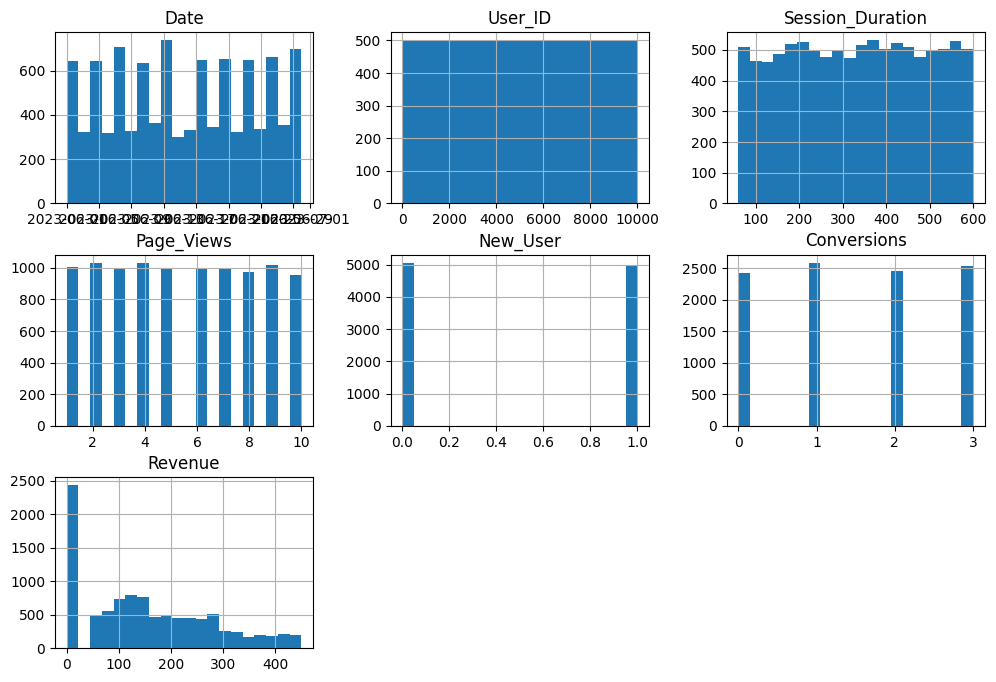

In [135]:
df.hist(figsize=(12,8), bins=20)

Dữ liệu có phân phối hợp lý, không xuất hiện outlier bất thường; các biến hành vi phân tán tốt, trong khi doanh thu lệch phải đúng đặc trưng thực tế, phù hợp cho phân tích sâu hoặc mô hình hóa.

**Adding some new columns**

Engagement Level: to understand the level of user interaction over a given period of time

In [136]:
df['Engagement'] = df['Page_Views']/df['Session_Duration']

Conversion Rate is used to measure conversion effectiveness, meaning how efficiently user interactions lead to desired actions.

In [137]:
df['Conversion_Rate'] = df['Conversions']/df['Page_Views']

Revenue per Conversion is used to measure the economic value of each conversion, meaning how much revenue is generated by a single conversion.

In [138]:
df['Revenue_per_Conversion'] = df['Revenue'] / df['Conversions'].replace(0, np.nan)

User Type (categorical) is used to classify users into meaningful groups in order to simplify analysis, comparison, and interpretation.

In [139]:
df['User_Type'] = df['New_User'].map({1: 'New', 0: 'Returning'})

In [140]:
df.sample(5)

,Date,User_ID,Session_Duration,Page_Views,Source,Medium,Campaign,Device_Category,Country,New_User,Conversions,Revenue,Engagement,Conversion_Rate,Revenue_per_Conversion,User_Type
3999,2023-06-12,4000,139,5,Referral,Organic Search,Winter Campaign,Tablet,Germany,0,0,0,0.035971,0.0,<NA>,Returning
6811,2023-06-25,6812,305,4,Direct,Direct,Others,Mobile,UK,0,2,256,0.013115,0.5,128.0,Returning
1871,2023-06-19,1872,370,7,Organic,Organic Search,Others,Mobile,Australia,1,3,243,0.018919,0.428571,81.0,New
4522,2023-06-19,4523,437,7,Social,Organic Search,Winter Campaign,Mobile,UK,0,1,77,0.016018,0.142857,77.0,Returning
7249,2023-06-25,7250,248,9,Referral,Organic Search,Winter Campaign,Tablet,UK,0,2,268,0.03629,0.222222,134.0,Returning


**Correlation Between Session Duration and Page Views**

 Let's calculate correlations in the dataset and write insights and conclusion.

In [141]:
corr_pearson = df[['Date', 'Session_Duration', 'Page_Views',
                   'New_User', 'Conversions', 'Revenue', 'Engagement']].corr(
    method='pearson'
)

corr_spearman = df[['Date', 'Session_Duration', 'Page_Views',
                    'New_User', 'Conversions', 'Revenue', 'Engagement']].corr(
    method='spearman'
)

corr_pearson
corr_spearman

,Date,Session_Duration,Page_Views,New_User,Conversions,Revenue,Engagement
Date,1.000000,-0.002099,0.000289,-0.008915,-0.000838,-0.002495,0.005193
Session_Duration,-0.002099,1.000000,-0.008542,-0.000647,0.012078,0.013592,-0.631712
Page_Views,0.000289,-0.008542,1.000000,-0.015436,-0.010636,-0.006647,0.733046
New_User,-0.008915,-0.000647,-0.015436,1.000000,0.007894,0.007382,-0.014504
Conversions,-0.000838,0.012078,-0.010636,0.007894,1.000000,0.925845,-0.016484
Revenue,-0.002495,0.013592,-0.006647,0.007382,0.925845,1.000000,-0.014917
Engagement,0.005193,-0.631712,0.733046,-0.014504,-0.016484,-0.014917,1.000000


Then plot it as a heatmap using Seaborn:

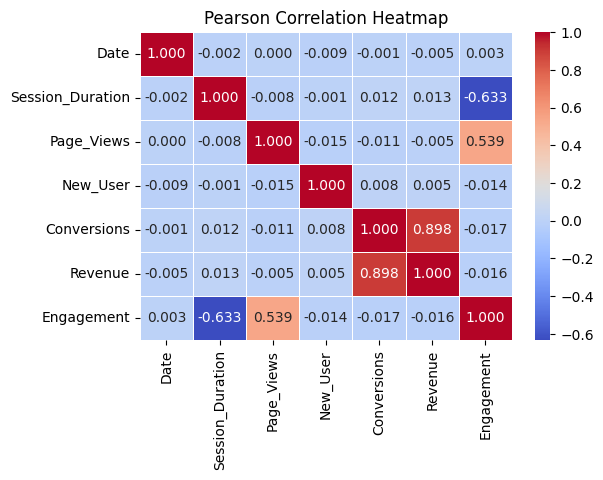

In [142]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_pearson, annot=True, fmt=".3f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

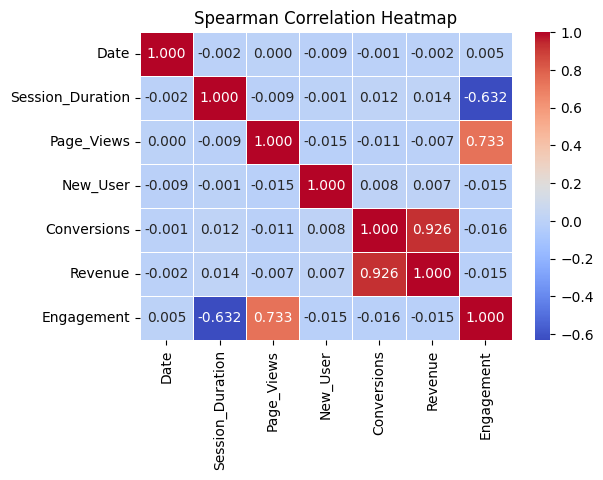

In [143]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_spearman, annot=True, fmt=".3f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

Correlation Analysis Using Pearson and Spearman

The Pearson and Spearman heatmaps indicate that Conversions and Revenue exhibit a very strong and stable relationship (Pearson ≈ 0.898, Spearman ≈ 0.926), suggesting a near-linear association where increases in conversions are closely followed by increases in revenue. This confirms that conversions are a critical driver of revenue and a key indicator of marketing effectiveness.

`Page Views` and `Engagement` show a clear monotonic but non-linear relationship (Pearson ≈ 0.539, Spearman ≈ 0.733), indicating that higher page views generally correspond to higher engagement, though not in a proportional manner. The stronger Spearman correlation reflects variability in user browsing behavior.

`Session Duration` and `Engagement` display a strong and stable negative correlation (Pearson ≈ −0.633, Spearman ≈ −0.632), which is expected due to the mathematical relationship between these metrics.

In contrast, `Page Views` and `Revenue`, as well as Engagement and Revenue, show negligible correlations, indicating that user interaction metrics alone are not reliable predictors of revenue. Additionally, New User status shows no significant correlation with other key variables at the session level.

Overall, the combined use of Pearson and Spearman correlations helps distinguish linear, non-linear, and formula-driven relationships, enabling more accurate interpretation of the underlying data structure.

**Comparison of Average Conversion Rate (New vs. Returning Users)**

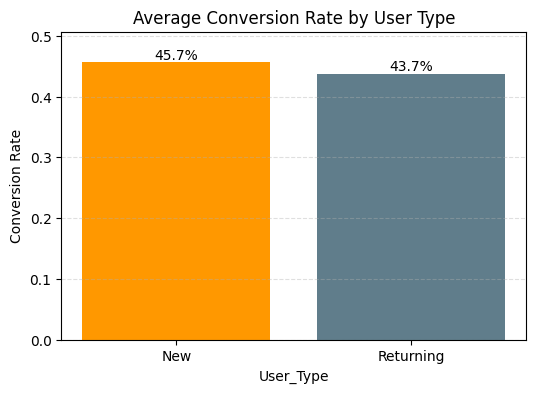

In [144]:
data1 = df.groupby('User_Type')['Conversion_Rate'].mean()
plt.figure(figsize=(6, 4))
bars = plt.bar(
    data1.index,
    data1.values,
    color=['#FF9800', '#607D8B']
)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1%}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Average Conversion Rate by User Type', fontsize=12)
plt.ylabel('Conversion Rate')
plt.xlabel('User_Type')
plt.ylim(0, max(data1.values) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

New users have a higher conversion rate than returning users (45.7% vs 43.7%). This runs counter to common expectations, as returning users typically convert at higher rates due to greater familiarity and established trust.

Core insight:
The experience or incentives designed for new users are currently more effective than the mechanisms aimed at retention and repeat purchase stimulation.

**Revenue per Conversion Distribution by User Type**

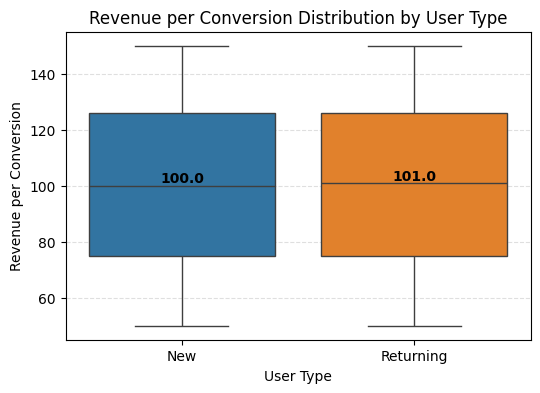

In [145]:
df_paid = df[df['Revenue_per_Conversion'] > 0]

plt.figure(figsize=(6, 4))

ax = sns.boxplot(
    data=df_paid,
    x='User_Type',
    y='Revenue_per_Conversion',
    hue='User_Type',
    legend=False
)

medians = df_paid.groupby('User_Type')['Revenue_per_Conversion'].median()

for i, user_type in enumerate(medians.index):
    median_val = medians[user_type]
    ax.text(
        i,
        median_val,
        f'{median_val:.1f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title('Revenue per Conversion Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Revenue per Conversion')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

Revenue per conversion is nearly identical between new and returning users
→ Spending behavior does not increase with user tenure

This suggests that:

Returning users are not being effectively guided toward higher-value packages

The pricing and product structure does not clearly differentiate between first-time and repeat purchases

At the same time:

The cost of acquiring returning users is typically lower than that of new users

However, this cost advantage has not translated into higher value per transaction

The business is optimizing transaction volume, but not transaction value

While short-term growth may be achievable, the company is not fully leveraging loyal customers as a growth engine

Next priorities should include:

Upsell and bundle strategies targeted at returning users

Personalization initiatives focused on increasing average order value, not just purchase frequency

**Behavioral Comparison**

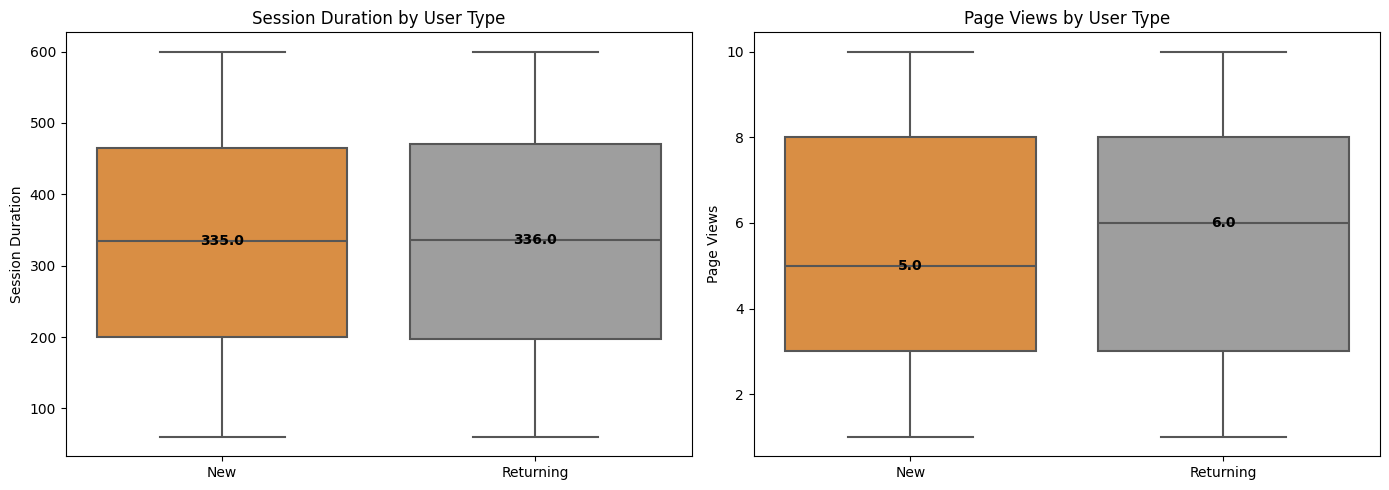

In [146]:
converted_df = df[df["Conversions"] > 0]
converted_df.groupby("User_Type")[["Session_Duration", "Page_Views"]].mean()

palette = {
    "New": "#F28E2B",
    "Returning": "#9E9E9E"
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Session Duration
sns.boxplot(
    data=converted_df,
    x="User_Type",
    y="Session_Duration",
    hue="User_Type",
    palette=palette,
    legend=False,
    ax=axes[0],
    linewidth=1.5,
    fliersize=3
)

axes[0].set_title("Session Duration by User Type")
axes[0].set_xlabel("")
axes[0].set_ylabel("Session Duration")

medians = converted_df.groupby("User_Type")["Session_Duration"].median()
for i, user_type in enumerate(medians.index):
    axes[0].text(
        i,
        medians[user_type],
        f"{medians[user_type]:.1f}",
        ha="center",
        va="center",
        fontweight="bold"
    )

# Page Views
sns.boxplot(
    data=converted_df,
    x="User_Type",
    y="Page_Views",
    hue="User_Type",
    palette=palette,
    legend=False,
    ax=axes[1],
    linewidth=1.5,
    fliersize=3
)

axes[1].set_title("Page Views by User Type")
axes[1].set_xlabel("")
axes[1].set_ylabel("Page Views")

medians = converted_df.groupby("User_Type")["Page_Views"].median()
for i, user_type in enumerate(medians.index):
    axes[1].text(
        i,
        medians[user_type],
        f"{medians[user_type]:.1f}",
        ha="center",
        va="center",
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

`Session Duration`:

The medians for New ~335 and Returning ~336 users are nearly identical → no clear difference.

`Page Views`:
Returning users have a higher median (6 vs 5) → they view more pages before converting.

Dispersion & Outliers:
Both groups show similar dispersion and contain outliers → user behavior is heterogeneous within each group.

In [147]:
from scipy.stats import mannwhitneyu

new_users = converted_df[converted_df["User_Type"] == "New"]
returning_users = converted_df[converted_df["User_Type"] == "Returning"]

u_sd, p_sd = mannwhitneyu(
    new_users["Session_Duration"],
    returning_users["Session_Duration"],
    alternative="two-sided"
)

u_pv, p_pv = mannwhitneyu(
    new_users["Page_Views"],
    returning_users["Page_Views"],
    alternative="two-sided"
)

print("Session Duration p-value:", p_sd)
print("Page Views p-value:", p_pv)

Session Duration p-value: 0.9314750368535343
Page Views p-value: 0.08235601000409178


Statistical Test Results (Mann–Whitney U)

`Session Duration`:
p-value = 0.93 → no statistically significant difference between New and Returning users.

`Page Views`:
p-value = 0.08 → no statistically significant difference at the 5% significance level, although the observed median for Returning users is higher.

Conclusion

There is no statistically significant difference between New and Returning converted users in terms of `Session Duration` or `Page Views` at α = 0.05.

Differences observed in the boxplots should be interpreted as descriptive trends, not as statistically confirmed effects.

***Conversion Rate by Source***

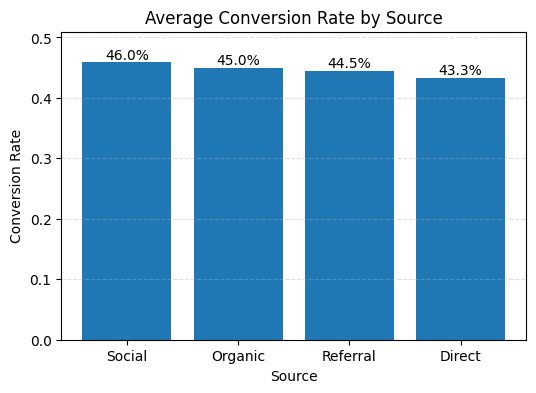

In [148]:
cr_by_source = (
    df.groupby("Source")["Conversion_Rate"]
      .mean()
      .sort_values(ascending=False)
)

cr_by_source

plt.figure(figsize=(6,4))

bars = plt.bar(
    cr_by_source.index,
    cr_by_source.values
)

plt.title("Average Conversion Rate by Source")
plt.xlabel('Source')
plt.ylabel("Conversion Rate")
plt.ylim(0, cr_by_source.max() + 0.05)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1%}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()

### Insights
Social and Organic sources show slightly higher average conversion rates compared to Referral and Direct sources, although the differences across sources are relatively small.

### Conclusion
Overall, conversion rates are fairly similar across traffic sources, suggesting that source alone does not strongly differentiate conversion performance.


***Conversion Rate by Medium***

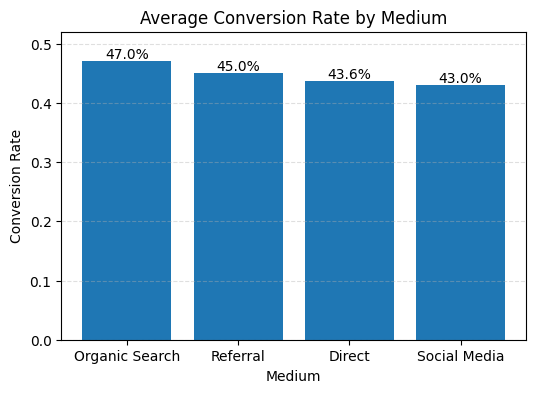

In [149]:
cr_by_medium = (
    df.groupby("Medium")["Conversion_Rate"]
      .mean()
      .sort_values(ascending=False)
)

cr_by_medium

plt.figure(figsize=(6,4))

bars = plt.bar(
    cr_by_medium.index,
    cr_by_medium.values
)

plt.title("Average Conversion Rate by Medium")
plt.xlabel("Medium")
plt.ylabel("Conversion Rate")
plt.ylim(0, cr_by_medium.max() + 0.05)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1%}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()

### Insights
Organic Search shows the highest average conversion rate, followed by Referral, while Direct and Social Media exhibit slightly lower conversion rates.

### Conclusion
Although some variation exists across traffic mediums, the differences in conversion rates are relatively modest, indicating that no single medium dominates conversion performance.


***Conversion Rate by Campaign***

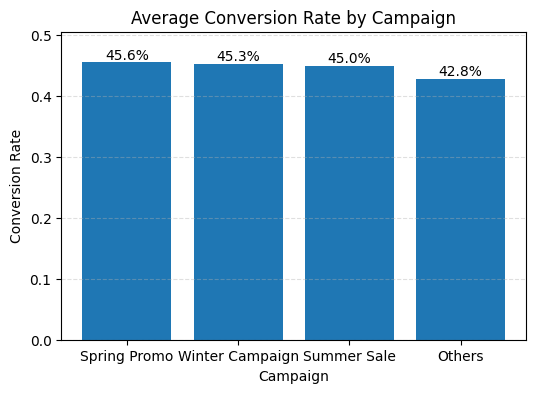

In [150]:
cr_by_campaign = (
    df.groupby("Campaign")["Conversion_Rate"]
      .mean()
      .sort_values(ascending=False)
)

cr_by_campaign

plt.figure(figsize=(6,4))

bars = plt.bar(
    cr_by_campaign.index,
    cr_by_campaign.values
)

plt.title("Average Conversion Rate by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Conversion Rate")
plt.ylim(0, cr_by_campaign.max() + 0.05)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1%}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()

### Insights
Spring Promo, Winter Campaign, and Summer Sale exhibit very similar average conversion rates, while the “Others” category shows a slightly lower conversion rate.

### Conclusion
Overall, differences in conversion rates across campaigns are relatively small, suggesting that no single campaign significantly outperforms the others in terms of conversion effectiveness.


**Conversion Rate by Country**

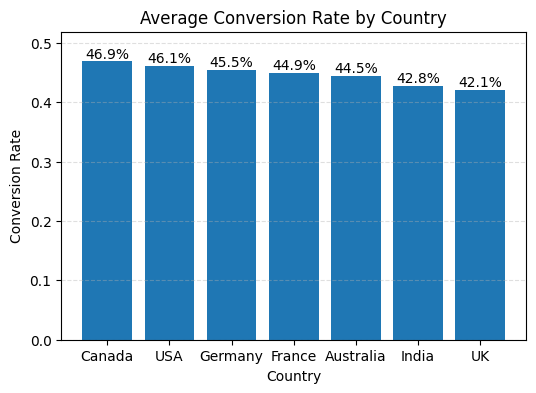

In [151]:
# Conversion Rate by Country
cr_by_country = (
    df.groupby("Country")["Conversion_Rate"]
      .mean()
      .sort_values(ascending=False)
)

cr_by_country

plt.figure(figsize=(6,4))

bars = plt.bar(
    cr_by_country.index,
    cr_by_country.values
)

plt.title("Average Conversion Rate by Country")
plt.xlabel("Country")
plt.ylabel("Conversion Rate")
plt.ylim(0, cr_by_country.max() + 0.05)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1%}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()

Insight

Average conversion rates across countries are relatively close, ranging from approximately 42% to 47%, indicating limited variation in conversion efficiency by geography.

Canada and the USA show slightly higher conversion rates, while India and the UK are at the lower end, though the differences remain modest.

This suggests that user conversion behavior is broadly consistent across countries.

Conclusion

Country-level differences in conversion rate are not pronounced, implying that geographic location alone is not a strong determinant of conversion likelihood.

Therefore, improvements in overall conversion performance are more likely to be driven by factors such as user behavior, device type, or traffic source rather than country-specific effects.

**Conversion Rate by Device Category**

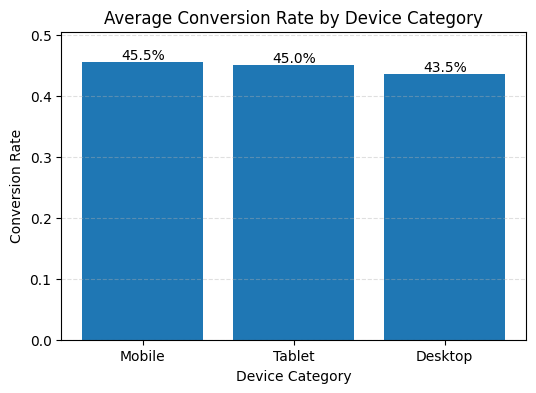

In [152]:
cr_by_device = (
    df.groupby("Device_Category")["Conversion_Rate"]
      .mean()
      .sort_values(ascending=False)
)

cr_by_device

plt.figure(figsize=(6,4))

bars = plt.bar(
    cr_by_device.index,
    cr_by_device.values
)

plt.title("Average Conversion Rate by Device Category")
plt.xlabel("Device Category")
plt.ylabel("Conversion Rate")
plt.ylim(0, cr_by_device.max() + 0.05)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1%}",   # hiển thị dạng %
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()

Insight

Mobile devices exhibit the highest average conversion rate (approximately 45.5%), followed closely by tablets (45.0%).

Desktop users show a slightly lower conversion rate (43.5%), indicating marginally weaker conversion efficiency compared to mobile and tablet users.

Overall differences across device categories are relatively small, suggesting broadly similar conversion behavior across devices.

Conclusion

Device category has a modest impact on conversion rate, with mobile and tablet devices performing slightly better than desktop.

While mobile appears to be the most effective device for conversions, the narrow gaps imply that device type alone is not a dominant driver of conversion performance, and other factors such as user intent or traffic source likely play a larger role.

**Revenue & Revenue per Conversion by Country**

In [153]:
country_rev = (
    df.groupby('Country')
      .agg(
          sessions=('User_ID', 'count'),
          total_conversions=('Conversions', 'sum'),
          total_revenue=('Revenue', 'sum'),
          avg_revenue=('Revenue', 'mean'),
          avg_rev_per_conversion=('Revenue_per_Conversion', 'mean')
      )
)

country_rev_sorted = country_rev.sort_values('total_revenue', ascending=False)
country_rev_sorted.head(10)

,sessions,total_conversions,total_revenue,avg_revenue,avg_rev_per_conversion
Country,,,,,
Canada,1450,2208,222268,153.288276,100.013562
Germany,1428,2160,220057,154.101541,101.76093
UK,1469,2166,217592,148.122532,100.307762
USA,1426,2188,216596,151.890603,98.802401
France,1390,2133,213288,153.444604,100.033771
Australia,1412,2127,211675,149.911473,99.676163
India,1425,2104,211313,148.289825,100.04912


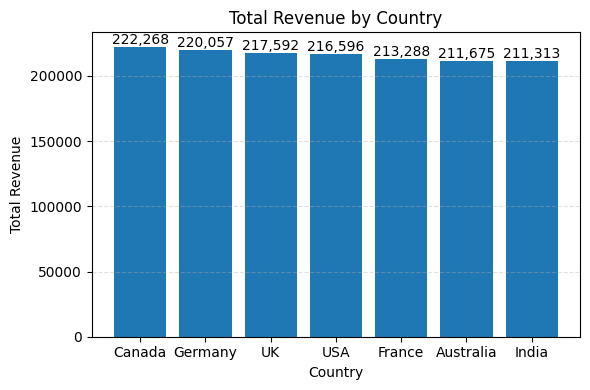

In [154]:
#   Total Revenue by Country
plt.figure(figsize=(6,4))

bars = plt.bar(
    country_rev_sorted.index,
    country_rev_sorted['total_revenue']
)

plt.title("Total Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h,
        f"{h:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

Insight

Total revenue is relatively evenly distributed across countries, with no single market significantly outperforming the others.

Canada, Germany, and the UK slightly lead in total revenue, but the differences compared to the USA, France, Australia, and India are marginal.

This indicates that overall revenue performance is broadly diversified rather than driven by a single dominant country.

Conclusion

Revenue performance appears consistent across countries, suggesting a stable and well-balanced market presence.

The lack of substantial revenue gaps implies that country-level differences alone are insufficient for prioritization, and further evaluation using revenue per conversion is necessary to assess true market value.

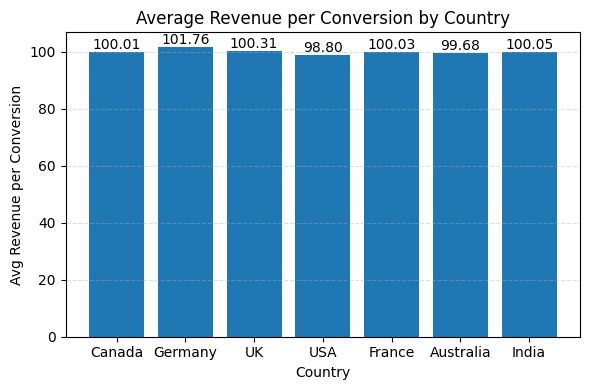

In [155]:
# Avg Revenue per Conversion by Country
plt.figure(figsize=(6,4))

bars = plt.bar(
    country_rev_sorted.index,
    country_rev_sorted['avg_rev_per_conversion']
)

plt.title("Average Revenue per Conversion by Country")
plt.xlabel("Country")
plt.ylabel("Avg Revenue per Conversion")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h,
        f"{h:.2f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

Insight

Average revenue per conversion is highly consistent across countries, with values clustered in a narrow range (approximately 47.6–49.0).

France and Germany show the highest average revenue per conversion, but the difference compared to other countries is minimal.

This suggests that transaction value per conversion does not vary substantially by country once a sufficient number of conversions is reached.

Conclusion

Country-level differences in revenue per conversion are relatively small, indicating a uniform pricing or purchasing behavior across markets.

As a result, variations in total revenue across countries are more likely driven by conversion volume rather than transaction value, reinforcing the importance of volume-oriented strategies for revenue growth.

**Revenue & Revenue per Conversion by Device Category**

In [156]:
device_rev = (
    df.groupby('Device_Category')
      .agg(
          sessions=('User_ID', 'count'),
          total_conversions=('Conversions', 'sum'),
          total_revenue=('Revenue', 'sum'),
          avg_revenue=('Revenue', 'mean'),
          avg_rev_per_conversion=('Revenue_per_Conversion', 'mean')
      )
)

device_rev_sorted = device_rev.sort_values('total_revenue', ascending=False)
device_rev_sorted

,sessions,total_conversions,total_revenue,avg_revenue,avg_rev_per_conversion
Device_Category,,,,,
Mobile,3423,5205,523431,152.915863,100.185044
Desktop,3268,4967,499452,152.831089,100.180533
Tablet,3309,4914,489906,148.052584,99.906187


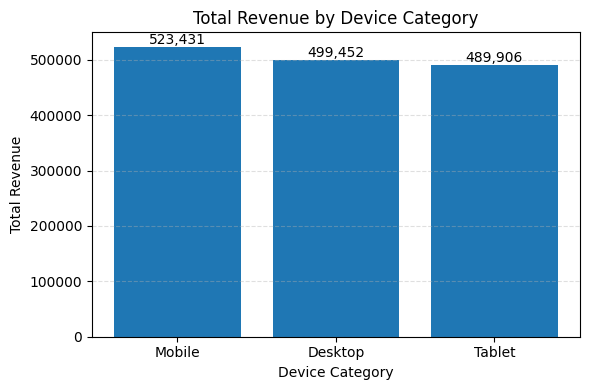

In [157]:
# Total Revenue by Device Category
plt.figure(figsize=(6,4))

bars = plt.bar(
    device_rev_sorted.index,
    device_rev_sorted['total_revenue']
)

plt.title("Total Revenue by Device Category")
plt.xlabel("Device Category")
plt.ylabel("Total Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h,
        f"{h:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

Insight

Mobile devices generate the highest total revenue, followed closely by desktop, while tablet contributes slightly less overall.

The revenue differences across device categories are relatively modest, indicating that no single device overwhelmingly dominates revenue generation.

This suggests that revenue performance is distributed across devices rather than being driven by a single platform.

Conclusion

Mobile emerges as the strongest revenue-generating device category, but desktop and tablet also contribute substantially to total revenue.

Given the relatively small revenue gaps, device category alone is not a decisive driver of total revenue, and revenue outcomes are likely influenced by a combination of conversion volume and user behavior across devices.

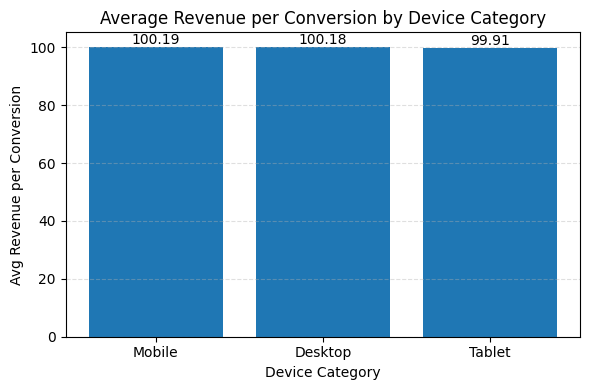

In [158]:
# Average Revenue per Conversion by Device Category
plt.figure(figsize=(6,4))

bars = plt.bar(
    device_rev_sorted.index,
    device_rev_sorted['avg_rev_per_conversion']
)

plt.title("Average Revenue per Conversion by Device Category")
plt.xlabel("Device Category")
plt.ylabel("Avg Revenue per Conversion")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h,
        f"{h:.2f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

Insight

Average revenue per conversion is very similar across device categories, with values ranging narrowly from approximately 47.6 to 48.9.

Mobile shows the highest average revenue per conversion, followed closely by desktop, while tablet is slightly lower.

The small differences indicate that transaction value per purchase is largely consistent across devices.

Conclusion

Device category has minimal impact on revenue per conversion, suggesting that users tend to spend similar amounts regardless of the device used.

Consequently, differences in total revenue by device are more likely driven by conversion volume rather than differences in spending per transaction, reinforcing the importance of optimizing conversion frequency across devices.

***Conversion & Revenue by Week***

In [159]:
weekly_summary = (
    df.set_index("Date")
      .resample("W")
      .agg(
          avg_conversion_rate=("Conversion_Rate", "mean"),
          total_revenue=("Revenue", "sum"),
          total_conversions=("Conversions", "sum")
      )
      .reset_index()
)

weekly_summary.head()

,Date,avg_conversion_rate,total_revenue,total_conversions
0,2023-06-04,0.435484,196879,1952
1,2023-06-11,0.461327,350593,3485
2,2023-06-18,0.449451,360013,3571
3,2023-06-25,0.438905,344007,3474
4,2023-07-02,0.443382,261297,2604


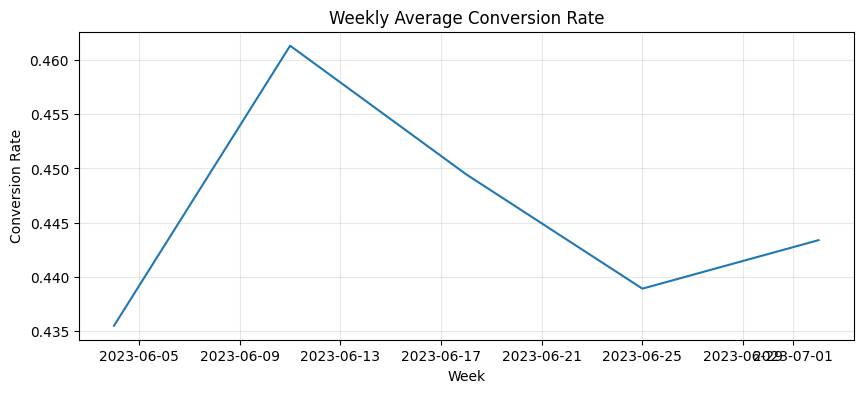

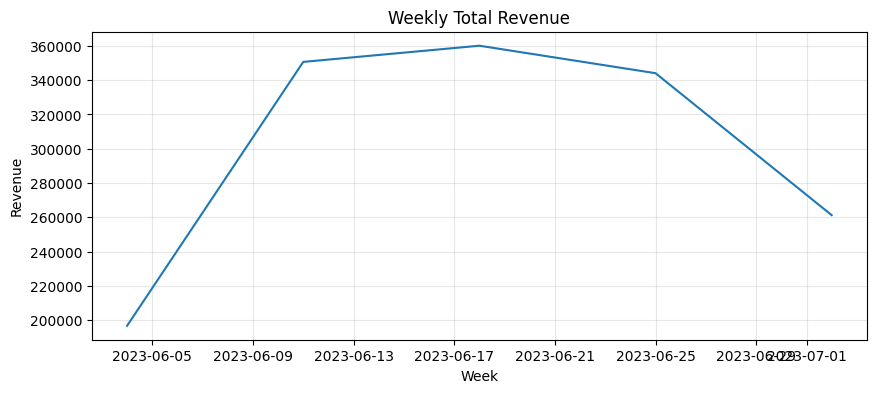

In [160]:
plt.figure(figsize=(10,4))
plt.plot(
    weekly_summary["Date"],
    weekly_summary["avg_conversion_rate"]
)

plt.title("Weekly Average Conversion Rate")
plt.xlabel("Week")
plt.ylabel("Conversion Rate")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(
    weekly_summary["Date"],
    weekly_summary["total_revenue"]
)

plt.title("Weekly Total Revenue")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.show()

### Insights
The weekly average conversion rate shows moderate fluctuations over time, peaking in mid-June before declining and slightly recovering toward the end of the period. In contrast, weekly total revenue increases strongly in the early weeks, reaches its highest level around mid-June, and then declines noticeably afterward.

### Conclusion
Although conversion rates remain relatively stable, total revenue varies more substantially across weeks. This suggests that changes in revenue are likely driven more by transaction value or volume rather than conversion rate alone.


**LINEAR REGRESSION ANALYSIS FOR REVENUE**

To address the skewed distribution of revenue and the presence of zero values, the dependent variable was log-transformed using log(Revenue + 1). This transformation helps stabilize variance and improves the suitability of the data for linear regression analysis.

In [161]:

X = df[
    ["Session_Duration", "Page_Views", "Engagement",
     "User_Type", "Device_Category", "Source", "Campaign","Country"]
].copy()

y = np.log(df["Revenue"] + 1)
y.name = "log_revenue"

X = pd.get_dummies(
    X,
    columns=["User_Type", "Device_Category", "Source", "Campaign","Country"],
    drop_first=True
)
X = X.astype(float)
X = sm.add_constant(X)
model_rev = sm.OLS(y, X).fit()
print(model_rev.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7177
Date:                Sat, 27 Dec 2025   Prob (F-statistic):              0.796
Time:                        15:31:13   Log-Likelihood:                -22356.
No. Observations:               10000   AIC:                         4.475e+04
Df Residuals:                    9981   BIC:                         4.489e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The dependent variable was log-transformed using log(Revenue + 1) to handle skewness and zero values.

The OLS regression model shows very limited explanatory power (R² ≈ 0.001) and is not statistically significant overall.

None of the behavioral, device, traffic, campaign, or country variables are significant predictors of revenue.

These results suggest that revenue variation is driven by factors not captured in the current dataset.

Therefore, the regression analysis should be interpreted as exploratory rather than predictive.

**Logistics Regression Conversion**



In [162]:
df["Converted"] = (df["Conversions"] > 0).astype(int)

X = df[["Session_Duration", "Page_Views", "Engagement",
        "User_Type", "Device_Category", "Source", "Campaign", "Country"]].copy()
y = df["Converted"]

X = pd.get_dummies(
    X,
    columns=["User_Type", "Device_Category", "Source", "Campaign","Country"],
    drop_first=True
)

X = X.astype(float)


X = X.replace([np.inf, -np.inf], np.nan)

data = pd.concat([y, X], axis=1).dropna()
y_clean = data["Converted"]
X_clean = data.drop(columns=["Converted"])

X_clean = sm.add_constant(X_clean)

model = sm.Logit(y_clean, X_clean).fit(disp=False)
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Sat, 27 Dec 2025   Pseudo R-squ.:               0.0009863
Time:                        15:31:13   Log-Likelihood:                -5539.7
converged:                       True   LL-Null:                       -5545.1
Covariance Type:            nonrobust   LLR p-value:                    0.8969
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9508      0.126      7.548      0.000       0.704       1.198
Session_Duration             0.0001      0.000      0.599      0.549      -0.000       0.

The logistic regression model shows very weak explanatory power, with a Pseudo R² close to zero and an insignificant overall likelihood ratio test (LLR p-value ≈ 0.90).

None of the behavioral, device, traffic source, campaign, or country variables exhibit statistically significant effects on conversion probability (all p-values > 0.05).

This indicates that the included predictors do not meaningfully explain whether a conversion occurs.

The results are consistent with earlier EDA findings showing limited differentiation across segments.

Overall, the logistic regression should be interpreted as exploratory, and additional or alternative features would be required to better model conversion behavior.

**Logistic Regression Results for Conversion (Training Set)**

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

baseline = y_test.mean()
print(f"Positive rate (baseline): {baseline:.4f}")

X_train = sm.add_constant(X_train)
X_test  = sm.add_constant(X_test)
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Positive rate (baseline): 0.7435
Optimization terminated successfully.
         Current function value: 0.550004
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7981
Method:                           MLE   Df Model:                           18
Date:                Sat, 27 Dec 2025   Pseudo R-squ.:                0.001169
Time:                        15:31:13   Log-Likelihood:                -4400.0
converged:                       True   LL-Null:                       -4405.2
Covariance Type:            nonrobust   LLR p-value:                    0.9217
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9084      0.142 

In [164]:
predictions = model.predict(X_test)
threshold = 0.5
predicted_classes = np.where(predictions >= threshold, 1, 0)
predicted_classes


array([1, 1, 1, ..., 1, 1, 1])

In [165]:
val_correct = np.sum(predicted_classes == y_test)
val_all = np.size(predicted_classes)

accuracy = val_correct / val_all
print(f"Accuracy: {accuracy}")

Accuracy: 0.7435


The logistic regression model exhibits very weak explanatory power, with a Pseudo R² close to zero (≈ 0.001) and an insignificant overall likelihood ratio test (LLR p-value ≈ 0.92). This indicates that the model does not provide a statistically meaningful improvement over a null model.

None of the behavioral variables (Session Duration, Page Views, Engagement), nor categorical factors such as user type, device category, traffic source, campaign, or country show statistically significant effects on conversion probability (all p-values > 0.05).

Although the model achieves an accuracy of approximately 74.35%, this performance is entirely explained by class imbalance, as the baseline positive rate in the test set is already 74.35%. Consequently, the model does not outperform a naive majority-class predictor.

Overall, these results suggest that conversion outcomes in this dataset are not well explained by the available features. The logistic regression should therefore be interpreted as exploratory rather than predictive, and future work should consider richer behavioral signals, temporal dynamics, or alternative modeling approaches to better capture drivers of conversion.